In [29]:
import torch
import torchvision  # 下载图像数据集
from torchvision import transforms  # 将PIL转成32位浮点数格式
from torch.utils import data  # 加载数据
import matplotlib.pyplot as plt
import numpy as np


## 下载数据


In [30]:
# Convert a PIL Image or numpy.ndarray to tensor. This transform does not support torchscript.
trans = transforms.ToTensor()


In [31]:
# root (string): Root directory of dataset where FashionMNIST/raw/train-images-idx3-ubyte
#                and FashionMNIST/raw/t10k-images-idx3-ubyte exist.
# train (bool, optional): If True, creates dataset from train-images-idx3-ubyte,
#                         otherwise from t10k-images-idx3-ubyte.
# download (bool, optional): If True, downloads the dataset from the internet and
#                            puts it in root directory. If dataset is already downloaded, it is not downloaded again.
# transform (callable, optional): A function/transform that takes in an PIL image
#                                 and returns a transformed version. E.g, transforms.RandomCrop

mnist_train = torchvision.datasets.FashionMNIST(
    root="../../data/", train=True, transform=trans, download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../../data/", train=False, transform=trans, download=True
)


In [32]:
len(mnist_train), len(mnist_test)


(60000, 10000)

## 加载数据


In [33]:
batch_size = 18


In [34]:
train_dataset_loader = data.DataLoader(mnist_train, batch_size)
test_dataset_loader = data.DataLoader(mnist_test, batch_size)


In [35]:
x, y = next(iter(train_dataset_loader))


In [36]:
x.shape


torch.Size([18, 1, 28, 28])

In [37]:
y.shape


torch.Size([18])

## 封装


In [110]:
# 封装
def load_data_fashion_mnist(batch_size):
    # 下载数据
    trans = transforms.ToTensor()
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../../data/", train=True, download=True, transform=trans
    )
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../../data/", train=False, download=True, transform=trans
    )
    # 加载数据
    mnist_train_data_loader = data.DataLoader(
        mnist_train, batch_size=batch_size, shuffle=True)
    mnist_test_data_loader = data.DataLoader(
        mnist_test, batch_size=batch_size, shuffle=True)
    return mnist_train_data_loader, mnist_test_data_loader


In [111]:
u, v = load_data_fashion_mnist(20)


In [114]:
m, n = next(iter(u))


In [115]:
m.shape


torch.Size([20, 1, 28, 28])

In [116]:
n.shape


torch.Size([20])

## 标签到文字的映射


In [38]:
def labels_int_to_text(labels_int):
    labels_text = ['t-shirt', 'trouser', 'pullover', 'dress',
                   'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels_text[label_int] for label_int in labels_int]


## 绘图


In [143]:
def show_images(imgs, row, column, titles=None, scale=1.5):
    # imgs存储图片
    # row表示行数
    # column表示列数
    # scale是缩放比例
    fig, axes = plt.subplots(nrows=row, ncols=column,
                             figsize=(column*scale, row*scale))
    plt.subplots_adjust(wspace=0.3*scale, hspace=0.3*scale)  # 调整子图之间的间隔
    for i in range(row):
        for j in range(column):
            ax = axes[i, j]
            img = imgs[i*column+j]
            new_shape = img.shape[1:]
            ax.imshow(img.reshape(new_shape))

            if titles:
                ax.set_title(f"{titles[i*column+j]}")
            else:
                ax.set_title(f"{(i,j)}")

            ax.get_xaxis().set_visible(False)  # x轴不可见
            ax.get_yaxis().set_visible(False)  # y轴不可见


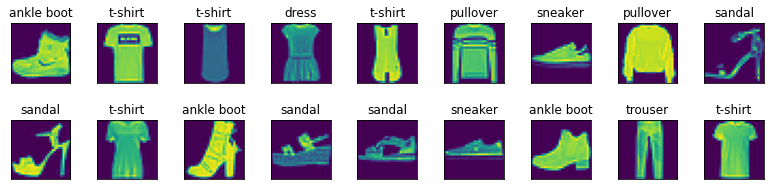

In [144]:
show_images(x, 2, 9, titles=labels_int_to_text(y))


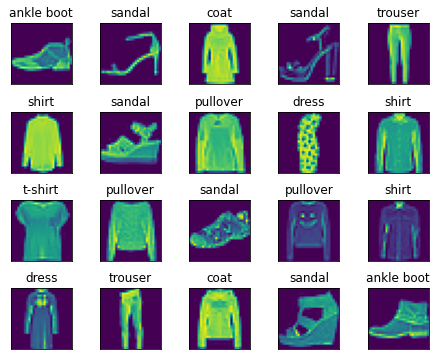

In [145]:
show_images(m, 4, 5, titles=labels_int_to_text(n))
